#### Use Random Forest to prepare a model on fraud data 

#### Importing Libearies 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import math 
from sklearn.model_selection import train_test_split 
import warnings 
from sklearn import tree

#### Importing Dataset 

In [2]:
data = pd.read_csv('F://Data_Set/Fraud_check.csv') 

In [3]:
data.head() 

,Undergrad,Marital_Status,Taxable_Income,City_Population,Work_Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO


Check any Null Value Present in the Dataset or Not 

In [4]:
data.isnull().sum() 

Undergrad          0
Marital_Status     0
Taxable_Income     0
City_Population    0
Work_Experience    0
Urban              0
dtype: int64

Check Dataset Information 

In [5]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Undergrad        600 non-null    object
 1   Marital_Status   600 non-null    object
 2   Taxable_Income   600 non-null    int64 
 3   City_Population  600 non-null    int64 
 4   Work_Experience  600 non-null    int64 
 5   Urban            600 non-null    object
dtypes: int64(3), object(3)
memory usage: 28.2+ KB


Check Description of the Dataset 

In [6]:
data.describe() 

,Taxable_Income,City_Population,Work_Experience
count,600.000000,600.000000,600.000000
mean,55208.375000,108747.368333,15.558333
std,26204.827597,49850.075134,8.842147
min,10003.000000,25779.000000,0.000000
25%,32871.500000,66966.750000,8.000000
50%,55074.500000,106493.500000,15.000000
75%,78611.750000,150114.250000,24.000000
max,99619.000000,199778.000000,30.000000


In [7]:
data.shape 

(600, 6)

Check any outlier Present in the Dataset or Not Using BoxPlot

BoxPlot of Taxable.Income Column 

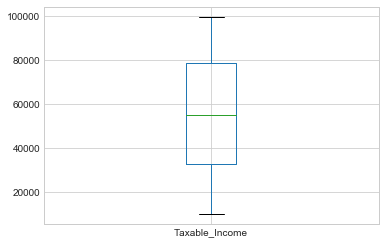

In [24]:
data.boxplot(column=['Taxable_Income']) 

BoxPlot of City.Population Population 

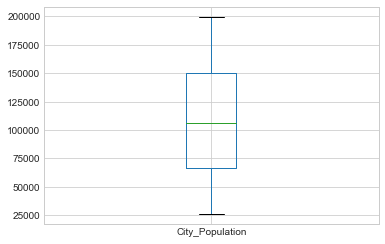

In [25]:
data.boxplot(column=['City_Population']) 

BoxPlot of Work.Experience Column 

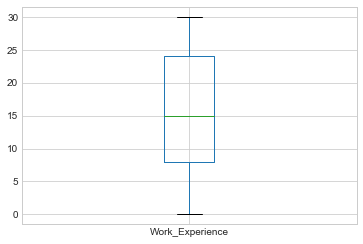

In [26]:
data.boxplot(column=['Work_Experience']) 

#### Visualization of Given Dataset 

Visualization of Undergrad Column 

<AxesSubplot:xlabel='count', ylabel='Undergrad'>

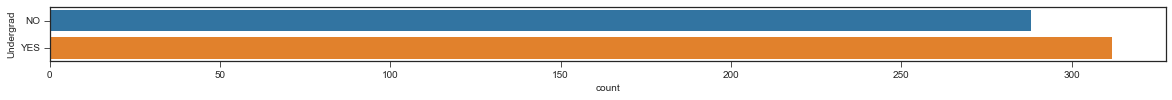

In [8]:
fig = plt.figure(figsize=(20,1))
plt.style.use('seaborn-ticks')
sns.countplot(y="Undergrad", data=data)   

Visualization of Marital.Status Column

<AxesSubplot:xlabel='count', ylabel='Marital_Status'>

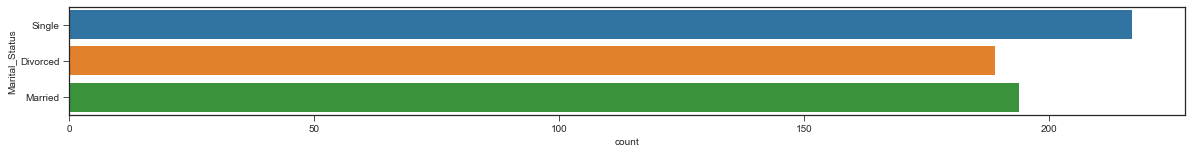

In [9]:
fig = plt.figure(figsize=(20,2)) 
plt.style.use('seaborn-ticks')
sns.countplot(y="Marital_Status", data=data)  

Visualization of Urban Column 

<AxesSubplot:xlabel='count', ylabel='Urban'>

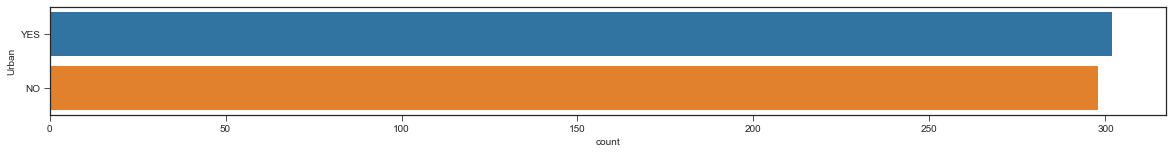

In [10]:
fig = plt.figure(figsize=(20,2)) 
plt.style.use('seaborn-ticks')
sns.countplot(y="Urban", data=data)  

#### Unique Elements of Categorical Columns 

Unique Elements of Undergrad Column 

In [11]:
data['Undergrad'].unique() 

array(['NO', 'YES'], dtype=object)

Unique Elements of Marital.Status Column 

In [12]:
data['Marital_Status'].unique()  

array(['Single', 'Divorced', 'Married'], dtype=object)

Unique Elements of Urban Column 

In [13]:
data['Urban'].unique() 

array(['YES', 'NO'], dtype=object)

#### frequency for categorical fields

In [14]:
category_col =['Undergrad', 'Marital_Status', 'Urban']  
for c in category_col:
    print (c)
    print (data[c].value_counts()) 

Undergrad
YES    312
NO     288
Name: Undergrad, dtype: int64
Marital_Status
Single      217
Married     194
Divorced    189
Name: Marital_Status, dtype: int64
Urban
YES    302
NO     298
Name: Urban, dtype: int64


In [15]:
# Let's use the Pandas Cut function to bin the data in equally sized buckets
data['Taxable_Income_bin'] = pd.cut(data['Taxable_Income'], 10)
data['Taxable_Income'] = data['Taxable_Income'] 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\seaborn\distributions.py:200: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\core\_methods.py:161: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\Nakul Raje\anaconda3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


(20.0, 60.0)

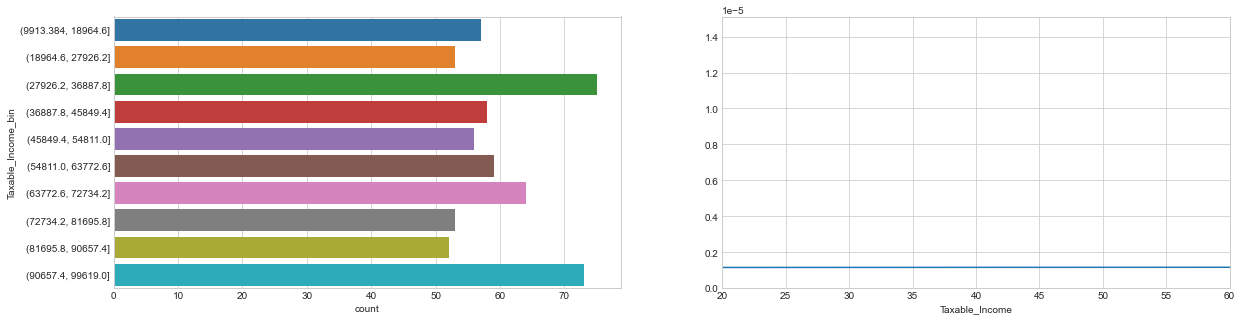

In [16]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure(figsize=(20,5)) 
plt.subplot(1, 2, 1)
sns.countplot(y="Taxable_Income_bin", data=data);
plt.subplot(1, 2, 2)
sns.distplot(data['Taxable_Income']);
sns.distplot(data[data['Taxable_Income'] == '>30000']['Taxable_Income'], kde_kws={"label": ">30000"})
sns.distplot(data[data['Taxable_Income'] == '<=30000']['Taxable_Income'], kde_kws={"label": "<30000"})
plt.ylim(0, None) 
plt.xlim(20, 60) 

In [17]:
dataset = data.copy() 

In [18]:
data.drop(["Taxable_Income_bin"],axis=1,inplace=True)  

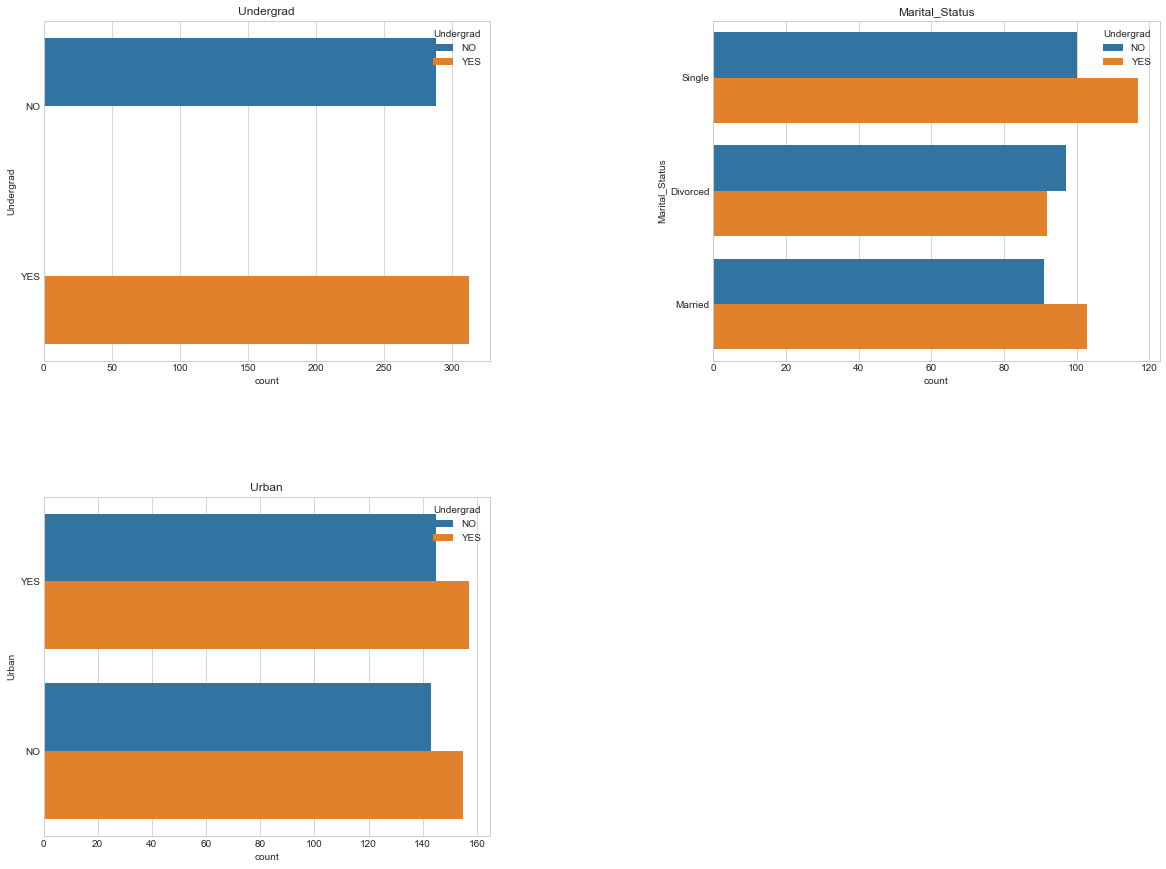

In [19]:
def plot_bivariate_bar(dataset, hue, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    dataset = dataset.select_dtypes(include=[np.object])
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, hue=hue, data=dataset)
            substrings = [s.get_text()[:10] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            
bivariate_df = data.loc[:, ['Undergrad', 'Marital_Status',  
           'Taxable_Income', 'City_Population', 
           'Work_Experience', 'Urban']]  

plot_bivariate_bar(bivariate_df, hue='Undergrad', cols=2, width=20, height=15, hspace=0.4, wspace=0.5)

Converting the Taxable_income variable to bucketing.

In [20]:
data["income"]="<=30000"
data.loc[data["Taxable_Income"]>=30000,"income"]="Good"
data.loc[data["Taxable_Income"]<=30000,"income"]="Risky"  

  Droping the Taxable_income variable 

In [21]:
data.drop(["Taxable_Income"],axis=1,inplace=True) 

In [22]:
data.head() 

,Undergrad,Marital_Status,City_Population,Work_Experience,Urban,income
0,NO,Single,50047,10,YES,Good
1,YES,Divorced,134075,18,YES,Good
2,NO,Married,160205,30,YES,Good
3,YES,Single,193264,15,YES,Good
4,NO,Married,27533,28,NO,Good


Rename the Columns 

In [23]:
data.rename(columns={"Undergrad":"undergrad","Marital_Status":"marital","City_Population":"population","Work_Experience":"experience","Urban":"urban"},inplace=True)

As we are getting error as "ValueError: could not convert string to float: 'YES'".
Model.fit doesnt not consider String. So, we encode

In [24]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()  
for column_name in data.columns:
    if data[column_name].dtype == object:
        data[column_name] = le.fit_transform(data[column_name])
    else:
        pass

In [25]:
data.head() 

,undergrad,marital,population,experience,urban,income
0,0,2,50047,10,1,0
1,1,0,134075,18,1,0
2,0,1,160205,30,1,0
3,1,2,193264,15,1,0
4,0,1,27533,28,0,0


Splitting the data into featuers and labels

In [26]:
features = data.iloc[:,0:5]
labels = data.iloc[:,5] 

Collecting the column names

In [27]:
colnames = list(data.columns)
predictors = colnames[0:5]
target = colnames[5] 

#### Split the Dataset in to Traning Set and Test Set 

In [28]:
x_train,x_test,y_train,y_test= train_test_split(features,labels,test_size=0.2,stratify = labels)

#### Model building

In [29]:
from sklearn.ensemble import RandomForestClassifier as RF 

In [30]:
model = RF(n_jobs = 3,n_estimators = 15, oob_score = True, criterion = "entropy") 

Train the Model

In [31]:
model.fit(x_train,y_train) 

C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:523: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:528: RuntimeWarning: invalid value encountered in true_divide
  predictions[k].sum(axis=1)[:, np.newaxis])


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='entropy', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=3,
                       oob_score=True, random_state=None, verbose=0,
                       warm_start=False)

In [32]:
model.estimators_

[DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=1518089013, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_depth=None, max_features='auto', max_leaf_nodes=None,
                        min_impurity_decrease=0.0, min_impurity_split=None,
                        min_samples_leaf=1, min_samples_split=2,
                        min_weight_fraction_leaf=0.0, presort='deprecated',
                        random_state=192400816, splitter='best'),
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                        max_dept

In [33]:
model.classes_ 

array([0, 1])

In [34]:
model.n_features_ 

5

In [35]:
model.n_classes_ 

2

In [36]:
model.n_outputs_ 

1

In [37]:
model.oob_score_ 

0.7333333333333333

#### Prediction on test data 

In [38]:
pred_test = model.predict(x_test) 

In [39]:
pred_test 

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

#### Check the Accuracy of model by Using Confusion Matrix 

In [40]:
from sklearn.metrics import confusion_matrix 

In [41]:
cm = confusion_matrix(y_test,pred_test) 

In [42]:
cm 

array([[88,  7],
       [25,  0]], dtype=int64)

#### Check the Accurcy of Model by Using Accuracy Score 

In [43]:
from sklearn.metrics import accuracy_score 

In [44]:
ac = accuracy_score(y_test,pred_test) 

In [45]:
ac 

0.7333333333333333

#### Visuvalize Decision tree present in Random forest

In [46]:
from sklearn.tree import export_graphviz
import pydotplus
from sklearn.externals.six import StringIO

C:\Users\Nakul Raje\anaconda3\lib\site-packages\sklearn\externals\six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [47]:
tree = model.estimators_[5]

dot_data = StringIO()
export_graphviz(tree,out_file = dot_data, filled = True,rounded = True, feature_names = predictors ,class_names = target,impurity =False)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

plt.show() 